# Decision Making through Natural Language Processing

How do we humans make decisions? Let's take an example to understand. Suppose, you want to enjoy the weekend by going to some place with your family. We put this down into simple sentences to visualize how our brain makes decision.

* **Objective**: Enjoy the day with family

The important keywords in above objective sentence are *enjoy*, *day* and *family*. Therefore, the first step is to extract the keywords from the objective statement.

We use the popular NLTK library to extract such information from the objective statement. Here's the flow as taught by NLTK

![](http://www.nltk.org/images/ie-architecture.png)

Since we're starting with a single, simple sentence, we can skip the first step of tokenizing into sentences. The script below shows how to tokenize the sentence and add Part of Speech tags

In [ ]:
import matplotlib as plt
from typing import List
import nltk
import re

# References
#   NLTK book: http://www.nltk.org/book/
#   NLTK sentiment analysis: https://www.digitalocean.com/community/tutorials/how-to-perform-sentiment-analysis-in-python-3-using-the-natural-language-toolkit-nltk

# https://www.lexalytics.com/lexablog/context-analysis-nlphttps://www.lexalytics.com/lexablog/context-analysis-nlp

# Reference: https://www.kdnuggets.com/2018/08/practitioners-guide-processing-understanding-text-2.htmlhttps://www.kdnuggets.com/2018/08/practitioners-guide-processing-understanding-text-2.html
# TODO sym-link doesn't work, need to debug and remove copy of map from here
CONTRACTION_MAP = {
"ain't": "is not",
"aren't": "are not",
"can't": "cannot",
"can't've": "cannot have",
"'cause": "because",
"could've": "could have",
"couldn't": "could not",
"couldn't've": "could not have",
"didn't": "did not",
"doesn't": "does not",
"don't": "do not",
"hadn't": "had not",
"hadn't've": "had not have",
"hasn't": "has not",
"haven't": "have not",
"he'd": "he would",
"he'd've": "he would have",
"he'll": "he will",
"he'll've": "he he will have",
"he's": "he is",
"how'd": "how did",
"how'd'y": "how do you",
"how'll": "how will",
"how's": "how is",
"I'd": "I would",
"I'd've": "I would have",
"I'll": "I will",
"I'll've": "I will have",
"I'm": "I am",
"I've": "I have",
"i'd": "i would",
"i'd've": "i would have",
"i'll": "i will",
"i'll've": "i will have",
"i'm": "i am",
"i've": "i have",
"isn't": "is not",
"it'd": "it would",
"it'd've": "it would have",
"it'll": "it will",
"it'll've": "it will have",
"it's": "it is",
"let's": "let us",
"ma'am": "madam",
"mayn't": "may not",
"might've": "might have",
"mightn't": "might not",
"mightn't've": "might not have",
"must've": "must have",
"mustn't": "must not",
"mustn't've": "must not have",
"needn't": "need not",
"needn't've": "need not have",
"o'clock": "of the clock",
"oughtn't": "ought not",
"oughtn't've": "ought not have",
"shan't": "shall not",
"sha'n't": "shall not",
"shan't've": "shall not have",
"she'd": "she would",
"she'd've": "she would have",
"she'll": "she will",
"she'll've": "she will have",
"she's": "she is",
"should've": "should have",
"shouldn't": "should not",
"shouldn't've": "should not have",
"so've": "so have",
"so's": "so as",
"that'd": "that would",
"that'd've": "that would have",
"that's": "that is",
"there'd": "there would",
"there'd've": "there would have",
"there's": "there is",
"they'd": "they would",
"they'd've": "they would have",
"they'll": "they will",
"they'll've": "they will have",
"they're": "they are",
"they've": "they have",
"to've": "to have",
"wasn't": "was not",
"we'd": "we would",
"we'd've": "we would have",
"we'll": "we will",
"we'll've": "we will have",
"we're": "we are",
"we've": "we have",
"weren't": "were not",
"what'll": "what will",
"what'll've": "what will have",
"what're": "what are",
"what's": "what is",
"what've": "what have",
"when's": "when is",
"when've": "when have",
"where'd": "where did",
"where's": "where is",
"where've": "where have",
"who'll": "who will",
"who'll've": "who will have",
"who's": "who is",
"who've": "who have",
"why's": "why is",
"why've": "why have",
"will've": "will have",
"won't": "will not",
"won't've": "will not have",
"would've": "would have",
"wouldn't": "would not",
"wouldn't've": "would not have",
"y'all": "you all",
"y'all'd": "you all would",
"y'all'd've": "you all would have",
"y'all're": "you all are",
"y'all've": "you all have",
"you'd": "you would",
"you'd've": "you would have",
"you'll": "you will",
"you'll've": "you will have",
"you're": "you are",
"you've": "you have"
}

def expand_contractions(text, contraction_mapping=CONTRACTION_MAP):
    print("> Expanding Contractions...")

    contractions_pattern = re.compile('({})'.format('|'.join(contraction_mapping.keys())), 
                                      flags=re.IGNORECASE|re.DOTALL)
    def expand_match(contraction):
        match = contraction.group(0)
        first_char = match[0]
        expanded_contraction = contraction_mapping.get(match)\
                                if contraction_mapping.get(match)\
                                else contraction_mapping.get(match.lower())                       
        expanded_contraction = first_char+expanded_contraction[1:]
        return expanded_contraction
        
    expanded_text = contractions_pattern.sub(expand_match, text)
    expanded_text = re.sub("'", "", expanded_text)
    return expanded_text

from nltk.stem import WordNetLemmatizer

# Cleans up input sentence (expand contractions, lemmatize, remove punctuations etc.) and converts into Parts of Speech tokens
def TagPartsOfSpeech(obj_statement: str, tokenize=True, pos_tag_help=False) -> List[str]:
    print("\n> Tagging Objective Statement into Parts-of-Speech:")
    print(obj_statement)

    if(tokenize == True):
        # Expand contractions, and Break text/sentence into tokens
        tokens = nltk.word_tokenize(expand_contractions(obj_statement))
    else:
        # Input is already tokenized
        tokens = obj_statement

    # print("\n> NLTK built-in Named Entry parser:")
    # print(nltk.ne_chunk(obj_statement))

    # Lemmatization
    lemmatizer = WordNetLemmatizer()
    # TODO check if right method, changes 'us/pronoun' to 'u/adjective' and 
    # tokens = [lemmatizer.lemmatize(token) for token in tokens]

    # Clean punctuations: comma TODO more string.punctuation as we're dealing only with a sentence
    tokens = [word for word in tokens if word != ',']

    # print(tokens)

    # Add Part Of Speech tags to tokens
    tagged = nltk.pos_tag(tokens) # Use default to allow subsequent classification possible: , tagset='universal')
    print(tagged)

    # KEEP-HELP: Meaning of each tag, and traversal through all tags
    if(pos_tag_help == True):
        for w, t in tagged:
            print(w, t, '->', nltk.help.upenn_tagset(t))

    return tagged

# Step 0: Input objective statement from user
print("> Enter the objective statement: ")
obj_statement = "We want to return back to India since we're not enjoying living in scotland" # "I want to enjoy the day with family" # TODO str(input())

print("\n> User provided objective statement: ")
print(obj_statement)

# Step 1: Tag Objective statement into parts-of-speech
tagged = TagPartsOfSpeech(obj_statement)

The next step is to detect entities, which are simply groups of words describing an element of the sentence. For example, in the code below, we extract 'Noun Phrase (NP)', which is determiner-adjective(s)-noun chunk.

Depending on what information one wants to extract, a RegExp can be defined to extract chunks from PoS tagged sentence. We break the sentence into NP-VP-NP chunks that we call 'Operation' (OPER)

In [ ]:
# Finds chunks as specified by 'grammer' in PoS tagged sentence 'word_tagged_sent'
def FindRegExpChunks(word_tagged_sent, grammer):
    cp = nltk.RegexpParser(grammer, loop=1)

    np_chunk = cp.parse(word_tagged_sent)
    print(np_chunk)

    return np_chunk

# Reference: http://www.nltk.org/book/ch07.htmlhttp://www.nltk.org/book/ch07.html

def ParseSentChunks(word_tagged_sent):
    # Chunking example 1
    # grammar_np = r"""
    #     NP:
    #         {<DT>?<JJ>*<NN>}    # an optional determiner (DT) followed by any number of adjectives (JJ) and then a noun (NN)
    #         {<NN>+}             # one or more nouns together
    #     """

    grammar = r"""
    NP:   {<DT|RB.*|JJ.*|IN|CD>*<PRP.*|NN.*>+}                         # Chunk sequences of (DT, JJ ...), (PRP, NN...)
    VP:   {<IN>?<VB.*|RB|TO>+<IN>*}                             # Chunk for verb-adverb-verb...
    OPER:   {<NP><VP><NP>}                # Chunk NP, VP, NP
    """

    #    P_P:   {<IN><NP>}                    # Chunk prepositions followed by NP
    #  V_P: {<VB.*><NP|PP|CLAUSE>+$}      # Chunk verbs and their arguments

    # CLAUSE: {<NP><VP>}                # Chunk NP, VP

    chunked = FindRegExpChunks(word_tagged_sent, grammar)
    return chunked

    # Chinking example (exlude part of sentence)
    # grammer2 = r"""
    #   NP:
    #     {<DT><NN>}  # Chunk DT followed by NN
    #     }<NN|IN>+{       # Chink sequences of NN and IN
    #     {<.*>+}          # Chunk everything
    #   """
    # chunk2 = FindRegExpChunks(tagged, grammer2)

chunked = ParseSentChunks(tagged)

Next, we test our Chunker using a corpus. Note that any general text won't fare well, since we're targetting 'objective statements'

In [ ]:
from nltk.corpus import gutenberg

#print(gutenberg.fileids()[0])
emma = nltk.corpus.gutenberg.sents('austen-emma.txt')[4:6]
for sent in emma:
    #print(sent)
    chunked = ParseSentChunks(TagPartsOfSpeech(sent, tokenize=False))


We now load a set of 'objective statements' and test our Parser.

In [ ]:
import os

def ReadObjSentsAndParseChunks():
    f = open('objective_statements.txt', 'r')
    chunked_sents = []
    for line in f:
        chunked = ParseSentChunks(TagPartsOfSpeech(line.strip(), pos_tag_help=False))
        chunked_sents.append(chunked)

    return chunked_sents

chunked_sents = ReadObjSentsAndParseChunks()

We now have the sentences chunked. Now we traverse through each chunk in every statement and try to make 'sense' of the information in the chunk/sentence

In [ ]:
from nltk.corpus import wordnet as wn

# Reference: word visualization at https://visuwords.com/

def GetPhraseWordList(p):
    w_lst = []
    pos_lst = []
    for node in p:
        # Assert that node is a tuple of len=2
        assert type(node) == tuple
        assert len(node) == 2

        # Extract word and part-of-speech
        w = node[0]
        pos = node[1]
        w_lst.append(w)
        pos_lst.append(pos)

    # Additional check to ensure 1:1 correspondence b/w word and pos
    assert len(w_lst) == len(pos_lst)

    return w_lst, pos_lst

def ProcessNPSubTree(t):
    print("NP processing: ", t.label())
    w, pos = GetPhraseWordList(t)
    print('words: ', w)
    print('pos: ', pos)

    print('Noun synset...')
    for n in w:
        # Find noun synonyms
        for syn in wn.synsets(n):
            print(n, syn)

def ProcessVPSubTree(t):
    print("VP processing: ", t.label())
    w, pos = GetPhraseWordList(t)
    print('words: ', w)
    print('pos: ', pos)

    print('Verb synset...')
    for v in w:
        # Find verb synonyms
        for syn in wn.synsets(v, 'v'):
            print('verb, syn, root: ', v, syn, syn.root_hypernyms())

def ProcessOperSubTree(t: nltk.tree.Tree):
    print("OPER processing: ", t.label())
    for subt in t:
        if type(subt) == nltk.tree.Tree:
            if subt.label() == 'NP':
                ProcessNPSubTree(subt)
            if subt.label() == 'VP':
                ProcessVPSubTree(subt)

def ProcessNonOperSubTree(t: nltk.tree.Tree):
    # TODO handle nested...
    print("Non-OPER processing: ", t.label())
    for subt in t:
        if type(subt) == nltk.tree.Tree:
            print('non-oper subt: ', subt.label())
            for c in subt:
                print('\tchild: ', c)

def traverseNltkTree(t: nltk.tree.Tree):
    for subt in t:
        if type(subt) == nltk.tree.Tree:
            if subt.label() == 'OPER':
                ProcessOperSubTree(subt)
            else:
                ProcessNonOperSubTree(subt)

for chunked_sent in chunked_sents:
    # print(type(chunked_sent))
    traverseNltkTree(chunked_sent)
    # print("\n")

IGRAPH U--- 7 6 --
+ attr: color (v), label (v)
+ edges:
0--1 0--2 1--3 1--4 2--5 2--6


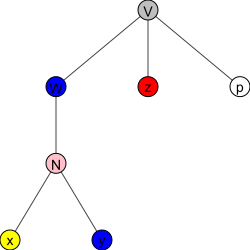

In [11]:
# Reference: https://igraph.org/python/doc/tutorial/tutorial.html

import igraph as ig

# Create graph
g = ig.Graph.Tree(7, 2)
# g.add_vertices(3)
# g.add_edges([(0,1), (1,2)])
# g = Graph([(0,1), (0,2), (2,3), (3,4), (4,2), (2,5), (5,0), (6,3), (5,6)])

# Plot graph/tree
g.vs["label"] = ["W", "N", "V", 'x', 'y', 'z', 'p']
color_dict = {"W": 'blue', "N": 'pink', "V": 'grey', 'x': 'yellow', 'y': 'blue', 'z': 'red', 'p': 'white'}
g.vs["color"] = [color_dict[label] for label in g.vs["label"]]
print(g)

layout = g.layout("tree")
ig.plot(g, layout=layout, bbox=(250,250), margin=10)